In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data_cardiovascular_risk.csv")

In [3]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [4]:
df.drop(["id"], axis = 1, inplace = True)

Independent variables in the dataset:
    
1.) Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) 

2.) Education: 1 - Higher Secorndary, 2- Graduate, 3 - Post Graduate 4- Doctarte or PHD

3.) Sex: male or female ("M" or "F") 

4.) is_smoking: whether or not the patient is a current smoker ("YES" or "NO") 

5.) Cigs Per Day: the number of cigarettes that the person smoked on average in one day .(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

6.) BP Meds: whether or not the patient was on blood pressure medication (Nominal) 

7.) Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal) 

8.) Prevalent Hyp: whether or not the patient was hypertensive (Nominal) 

9.) Diabetes: whether or not the patient had diabetes (Nominal) 

10.) Tot Chol: total cholesterol level (Continuous) 

11.) Sys BP: systolic blood pressure (Continuous) 

12.) Dia BP: diastolic blood pressure (Continuous) 

13.) BMI: Body Mass Index (Continuous) 

14.) Heart Rate: heart rate(Continuous - In medical research, variables such as heart rate thought discrete, are considered continuous because of a large number of possible values.) 

15.) Glucose: glucose level (Continuous) 

Dependent/Target variable (desired target): 
10-year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”) – DV

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


Here after the study of the given dataset and having the basic understanding we can say that independent varible 
"Education" has nothing to do with the patients Health or "Cardio Vasclular risk". So we can drop the "Education" column.

In [6]:
df.drop(["education"], axis = 1, inplace = True)

In [7]:
print("SUM OF MISSING VALUES IN EACH COLUMN:\n", df.isnull().sum())
print("TOTAL NO OF MISSING VALUES IN THE DATASET:", df.isnull().sum().sum())

SUM OF MISSING VALUES IN EACH COLUMN:
 age                  0
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64
TOTAL NO OF MISSING VALUES IN THE DATASET: 423


<AxesSubplot:title={'center':'MISSING VALUES'}>

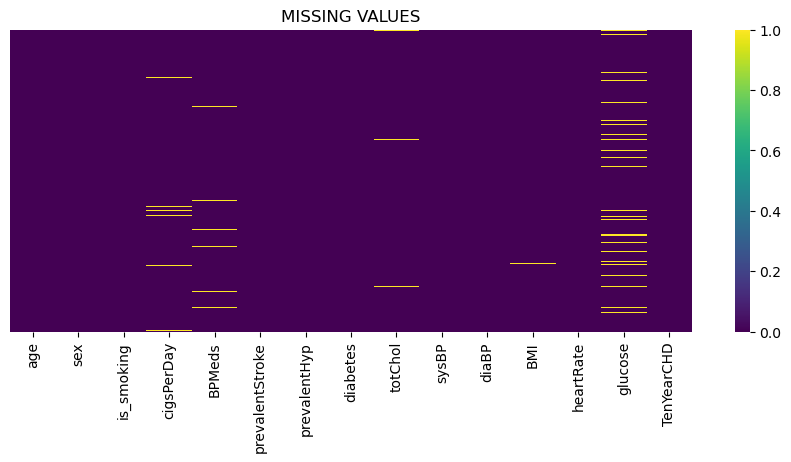

In [8]:
plt.figure(figsize=(11,4),dpi= 100)
plt.title("MISSING VALUES")
sns.heatmap(df.isnull(), cmap='viridis', yticklabels=False)

In [9]:
df.describe()

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,49.542183,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,70.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


<AxesSubplot:>

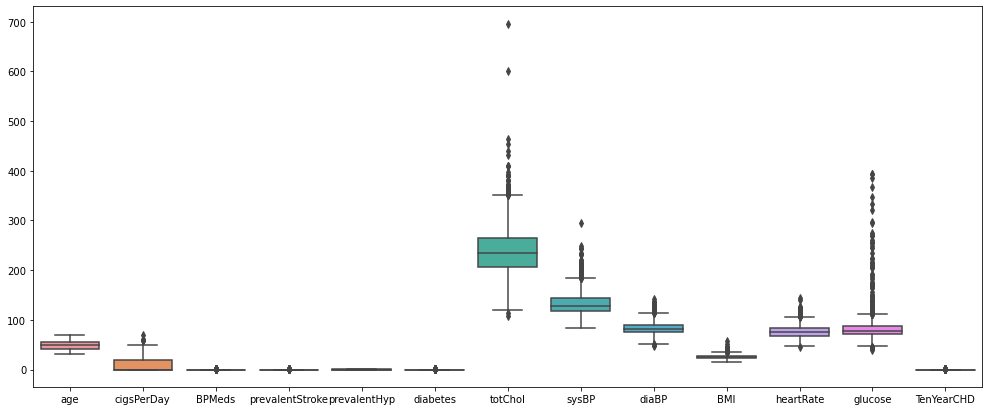

In [10]:
#CHECKING OUTLIERS
plt.figure(figsize=(17,7))
sns.boxplot(data = df)

In [11]:
#Handling Missing Data
df["cigsPerDay"]= df["cigsPerDay"].fillna(df["cigsPerDay"].median()) #outliers are present so median approch

In [12]:
df["BPMeds"]= df["BPMeds"].fillna(df["BPMeds"].median()) 

In [13]:
df["totChol"]= df["totChol"].fillna(df["totChol"].median())

In [14]:
df["BMI"]= df["BMI"].fillna(df["BMI"].median())

In [15]:
df["heartRate"]= df["heartRate"].fillna(df["heartRate"].median())

In [16]:
df["glucose"]= df["glucose"].fillna(df["glucose"].median())

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   sex              3390 non-null   object 
 2   is_smoking       3390 non-null   object 
 3   cigsPerDay       3390 non-null   float64
 4   BPMeds           3390 non-null   float64
 5   prevalentStroke  3390 non-null   int64  
 6   prevalentHyp     3390 non-null   int64  
 7   diabetes         3390 non-null   int64  
 8   totChol          3390 non-null   float64
 9   sysBP            3390 non-null   float64
 10  diaBP            3390 non-null   float64
 11  BMI              3390 non-null   float64
 12  heartRate        3390 non-null   float64
 13  glucose          3390 non-null   float64
 14  TenYearCHD       3390 non-null   int64  
dtypes: float64(8), int64(5), object(2)
memory usage: 397.4+ KB


In [18]:
df.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [19]:
#converting varibles sex and is_smoking to numeric type from object type with the help of Label Encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["sex"] = encoder.fit_transform(df["sex"])
df["is_smoking"] = encoder.fit_transform(df["is_smoking"])

In [20]:
df.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


Although its a Classifcation problem i do not recommand usage of outlier treatment in Classification. Outliers do play High 
Impact in Regression problems.It is not good idea to remove the data by outlier treatment ,its better to do square root or 
log transformation in place of removing outliers. Instead of doing outlier and then doing feature scalling, the good
idea is to feature scalling directly because after feature scalling many outliers aumatically come in to the range.if 
we are using random forest Bagging method feature scalling is also not required.(no standardization impact)

In [21]:
df.TenYearCHD.value_counts() #its a imbalanced dataset 

0    2879
1     511
Name: TenYearCHD, dtype: int64

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

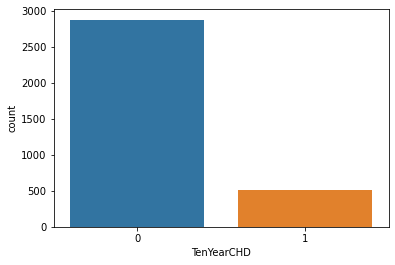

In [22]:
sns.countplot(x="TenYearCHD", data=df)

0    1923
1    1467
Name: sex, dtype: int64


[Text(0.5, 0, 'gender of patients')]

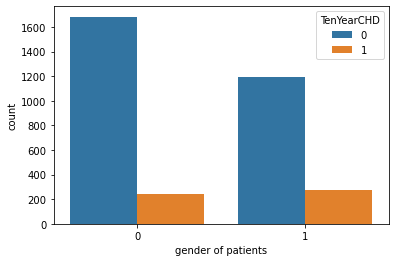

In [23]:
Gender_count = df.sex.value_counts()
print(Gender_count)
gender_count=sns.countplot(x="sex", data=df,hue="TenYearCHD")
gender_count.set(xlabel="gender of patients")
# both male and female have equal chances of cardio vascular risk [0 : Female AND 1 : Male]

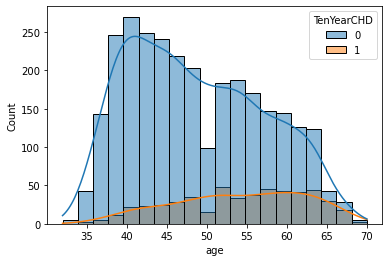

In [24]:
sns.histplot(data=df,x="age",hue="TenYearCHD",bins=20,kde=True)
plt.show()
# condition (target) : 0 = no TenYearCHD, 1 = TenYearCHD
# We can say that Cardiovascular risk is maximum risk at age 40-65 age

0.0    3290
1.0     100
Name: BPMeds, dtype: int64


Text(0.5, 1.0, 'TenYearCHD vs. BPMeds')

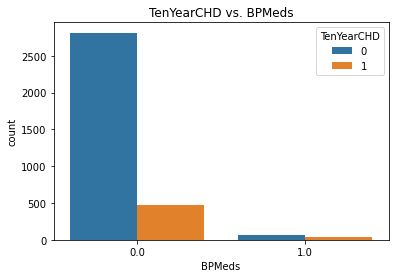

In [25]:
BPmeds_count = df.BPMeds.value_counts()
print(BPmeds_count)
sns.countplot(data=df, x='BPMeds', hue='TenYearCHD') 
plt.title('TenYearCHD vs. BPMeds')
#Chances of cardio vascular risk is very low for people who are not under any BP Medication. 

0    1703
1    1687
Name: is_smoking, dtype: int64


Text(0.5, 1.0, 'TenYearCHD vs. Smoking')

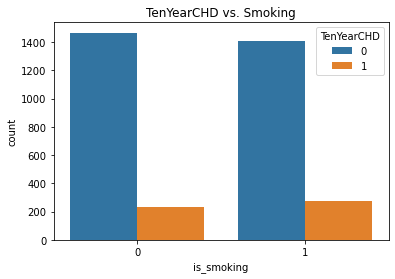

In [26]:
smokeing_count = df.is_smoking.value_counts()
print(smokeing_count)
sns.countplot(data=df, x='is_smoking', hue='TenYearCHD') 
plt.title('TenYearCHD vs. Smoking')
#There is similar cardio vascular risk ratios for both smokers and non smokers.

0    3303
1      87
Name: diabetes, dtype: int64


Text(0.5, 1.0, 'TenYearCHD vs. Diabetes')

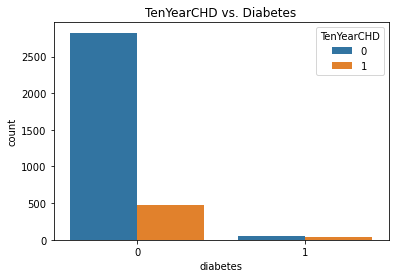

In [27]:
diabatic_count = df.diabetes.value_counts()
print(diabatic_count)
sns.countplot(data=df, x='diabetes', hue='TenYearCHD') 
plt.title('TenYearCHD vs. Diabetes')
#Cardio vascular risk is less for non diabetic patients and more in diabetic patients

* if there is high corelation between more than 2 independent variables then it is called Multi collinearity. Than we can 
  drop any of that equal Ind Variable. Same data we can plot in heatmap for more better understanding.
* Actually, we are interested in classification, No need to get rid of collinear variables.Multicollinearity mostly occurs
  in a regression model when two or more independent variable are highly correlated to eachother.

<AxesSubplot:>

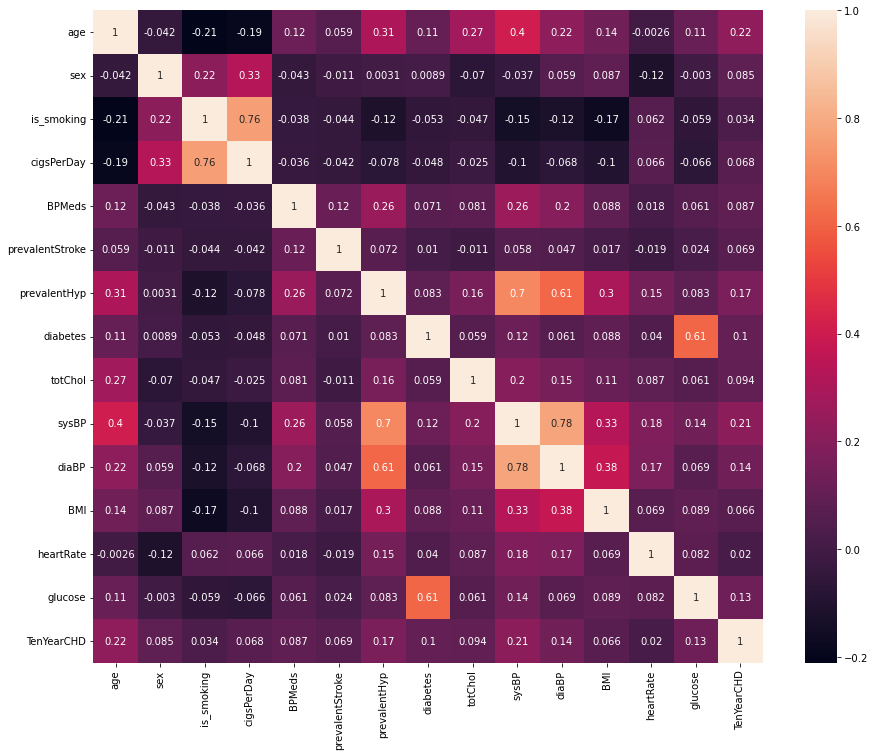

In [28]:
df_corr = df.corr()
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot = True)

EDA summary:
1.)its a imbalanced dataset 
2.)Both male and female patients have equal chances of cardio vascular risk.
3.)We can say that Cardiovascular risk is maximum at age 40-65 age.
4.)Chances of cardio vascular risk is very low for people who are not under any BP Medication. 
5.)There is similar cardio vascular risk ratios for both smokers and non smokers. 
6.)Cardio vascular risk is less for non diabetic patients and more in diabetic patients.

In [29]:
#Splitting data into dependent and independent variables
X=df.drop(["TenYearCHD"],axis=1)
Y=df["TenYearCHD"]

In [30]:
X.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,64,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0
1,36,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0
2,46,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0
3,50,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0
4,64,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0


In [31]:
Y.head()

0    1
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

In [32]:
# Feature scaling standarization to bring all the values 0 and -3.
from sklearn.preprocessing import StandardScaler
scaljob=StandardScaler()
X_scaled=scaljob.fit_transform(X)
# we are getting the array value we sould change it in DATAFRAME 
X_scaled_DF=pd.DataFrame(X_scaled,index=X.index,columns=X.columns)
X_scaled_DF

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.682783,-0.873425,1.004731,-0.506751,-0.174342,-0.080821,-0.678658,-0.162295,-0.356539,0.690879,0.176093,-0.100635,1.171675,-0.074275
1,-1.576210,1.144919,-0.995291,-0.759679,-0.174342,-0.080821,1.473495,-0.162295,-0.556594,1.588193,1.257462,0.968422,-0.332292,-0.290185
2,-0.412284,-0.873425,1.004731,0.083414,-0.174342,-0.080821,-0.678658,-0.162295,0.288084,-0.744824,-0.988457,-1.325547,1.004567,0.530271
3,0.053287,1.144919,1.004731,0.926507,-0.174342,-0.080821,1.473495,-0.162295,-0.089799,1.139536,0.425640,0.600706,-0.666507,0.530271
4,1.682783,-0.873425,1.004731,1.769600,-0.174342,-0.080821,-0.678658,-0.162295,0.088028,0.174923,0.176093,0.152627,-0.499400,-0.203821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,1.217213,-0.873425,-0.995291,-0.759679,-0.174342,-0.080821,-0.678658,-0.162295,0.532596,-0.408331,-0.323000,0.849097,-0.499400,0.918908
3386,-0.412284,-0.873425,-0.995291,-0.759679,-0.174342,-0.080821,-0.678658,-0.162295,-0.845563,-1.372943,-2.236189,-0.933478,0.336137,0.098452
3387,-0.645069,1.144919,1.004731,-0.506751,-0.174342,-0.080821,1.473495,-0.162295,2.555377,1.408730,3.004287,0.761429,-0.248739,-0.419731
3388,1.217213,1.144919,-0.995291,-0.759679,-0.174342,-0.080821,1.473495,-0.162295,-1.023390,1.543327,1.839737,-0.677780,0.336137,0.141634


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test=train_test_split(X_scaled_DF,Y,train_size=0.70,random_state=101)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2373, 14)
(1017, 14)
(2373,)
(1017,)


In [34]:
Y_train.value_counts()

0    1994
1     379
Name: TenYearCHD, dtype: int64

In [35]:
Y.value_counts() #imbalance

0    2879
1     511
Name: TenYearCHD, dtype: int64

In [36]:
#BALANCING THE DATASET
#Balancing should we done only on training data not on the entire dataset or on testing data
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X_train_smote, Y_train_smote = sm.fit_resample(X_train, Y_train)
print("Bofore balancing X_train", X_train.shape)
print("*******"*5)
print("Bofore balancing Y_train", Y_train.shape)
print("*******"*5)
print(" no. of different class before balancing \n", Y_train.value_counts())
print("*******"*5)

Bofore balancing X_train (2373, 14)
***********************************
Bofore balancing Y_train (2373,)
***********************************
 no. of different class before balancing 
 0    1994
1     379
Name: TenYearCHD, dtype: int64
***********************************


In [37]:
print("After balancing X_train",X_train_smote.shape)
print("*******"*5)
print("After balancing Y_train",Y_train_smote.shape)
print("*******"*5)
print("After SMOTE method Dependent value counts")
Y_train_smote.value_counts()

After balancing X_train (3988, 14)
***********************************
After balancing Y_train (3988,)
***********************************
After SMOTE method Dependent value counts


0    1994
1    1994
Name: TenYearCHD, dtype: int64

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [39]:
def evaluate(model, X_train, X_test, Y_train, Y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(Y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(Y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(Y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(Y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(Y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(Y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

# LOGISTIC REGRESSION

In [40]:
from sklearn.linear_model import LogisticRegression
LRM_param_grid = {'C': [0.01, 0.1, 1, 10, 100],  
                  'penalty':['l1', 'l2', 'elasticnet', 'none'],
                  'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']} 
LRM = GridSearchCV(LogisticRegression(),
                        LRM_param_grid)

In [41]:
LRM.fit(X_train_smote,Y_train_smote)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']})

In [42]:
LRM.best_params_

{'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}

In [43]:
LRM.best_estimator_

LogisticRegression(C=0.01, penalty='l1', solver='saga')

In [44]:
LRM_grid_ytrain_pred = LRM.predict(X_train)
print("Logistic Regression Training Accuracy:",accuracy_score(Y_train, LRM_grid_ytrain_pred))
LRM_grid_y_pred = LRM.predict(X_test)
print("Logistic Regression Testing Accuracy:",accuracy_score(Y_test, LRM_grid_y_pred))

Logistic Regression Training Accuracy: 0.6750948166877371
Logistic Regression Testing Accuracy: 0.6578171091445427


In [45]:
#cross validation
from sklearn.model_selection import cross_val_score
LRM_CVS_TRAIN = cross_val_score(estimator = LRM, X = X_train_smote, y = Y_train_smote, cv = 10)
print("After cross validation the accuracy in logistic regression is:",LRM_CVS_TRAIN.mean())

After cross validation the accuracy in logistic regression is: 0.6780412085490107


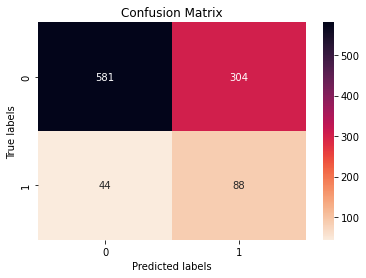

In [46]:
LRM_CM = confusion_matrix(Y_test, LRM_grid_y_pred)
ax= plt.subplot()
sns.heatmap(LRM_CM, annot=True, fmt='g',cmap='rocket_r');#cmap='rocket_r' for color inverse of the scale
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [47]:
print(classification_report(Y_test,LRM_grid_y_pred))

              precision    recall  f1-score   support

           0       0.93      0.66      0.77       885
           1       0.22      0.67      0.34       132

    accuracy                           0.66      1017
   macro avg       0.58      0.66      0.55      1017
weighted avg       0.84      0.66      0.71      1017



In [48]:
from sklearn import metrics
LMR_Proba_score_positive_class= LRM.predict_proba(X_test)[:,1]
LMR_Proba_score_positive_class 

array([0.26723033, 0.66999532, 0.62740201, ..., 0.44970541, 0.36629667,
       0.6178067 ])

In [49]:
fpr1, tpr1, thresholds1 = metrics.roc_curve(Y_test, LMR_Proba_score_positive_class, pos_label=1)
print("FPR",fpr1)
print("TPR",tpr1)
print("thresholds",thresholds1)

FPR [0.         0.         0.         0.00112994 0.00112994 0.00225989
 0.00225989 0.00338983 0.00338983 0.00451977 0.00451977 0.00564972
 0.00564972 0.00903955 0.00903955 0.01016949 0.01016949 0.01129944
 0.01129944 0.01920904 0.01920904 0.02259887 0.02259887 0.02372881
 0.02372881 0.04971751 0.04971751 0.0519774  0.0519774  0.05649718
 0.05649718 0.06101695 0.06101695 0.06214689 0.06214689 0.06440678
 0.06440678 0.06892655 0.06892655 0.07231638 0.07231638 0.07344633
 0.07344633 0.07457627 0.07457627 0.0779661  0.0779661  0.08361582
 0.08361582 0.08700565 0.08700565 0.08813559 0.08813559 0.08926554
 0.08926554 0.09152542 0.09152542 0.09378531 0.09378531 0.09717514
 0.09717514 0.09943503 0.09943503 0.10169492 0.10169492 0.10282486
 0.10282486 0.12090395 0.12090395 0.13333333 0.13333333 0.13785311
 0.13785311 0.13898305 0.13898305 0.14011299 0.14011299 0.14124294
 0.14124294 0.14576271 0.14576271 0.1480226  0.1480226  0.1559322
 0.1559322  0.15706215 0.15706215 0.16723164 0.16723164 0.1

In [50]:
from sklearn.metrics import roc_auc_score
LMR_auc_score = roc_auc_score(Y_test, LMR_Proba_score_positive_class)
print("AUC SCORE:",LMR_auc_score)

AUC SCORE: 0.7094675569251842


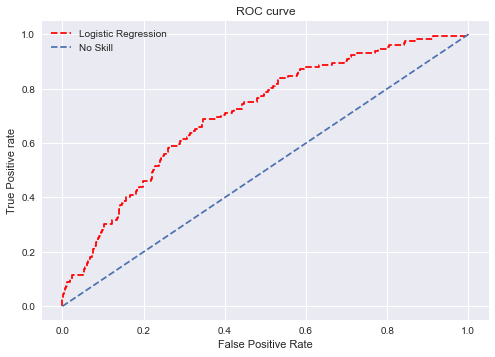

In [51]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC', dpi=300)
plt.show()

# KNN CLASSIFIER

In [52]:
from sklearn.neighbors import KNeighborsClassifier
KNN_param_grid = {'n_neighbors': list(range(1,100)), 
                  'leaf_size': list(range(1,100)),
                  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                  'p': [1,2],
                  'weights': ['uniform','distance']}

#GridSearchCV took a lot of time so using a faster alternative RandomizedSearchCV
KNN = RandomizedSearchCV(KNeighborsClassifier(),
                   KNN_param_grid)

In [53]:
KNN.fit(X_train_smote,Y_train_smote)

RandomizedSearchCV(estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29, 30, ...],
             

In [54]:
KNN.best_params_

{'weights': 'distance',
 'p': 1,
 'n_neighbors': 9,
 'leaf_size': 61,
 'algorithm': 'auto'}

In [55]:
KNN.best_estimator_

KNeighborsClassifier(leaf_size=61, n_neighbors=9, p=1, weights='distance')

In [56]:
KNN_grid_ytrain_pred = KNN.predict(X_train)
print("KNN Training Accuracy:",accuracy_score(Y_train, KNN_grid_ytrain_pred))
KNN_grid_y_pred = KNN.predict(X_test)
print("KNN Testing Accuracy:",accuracy_score(Y_test, KNN_grid_y_pred))

KNN Training Accuracy: 1.0
KNN Testing Accuracy: 0.591937069813176


In [57]:
from sklearn.model_selection import cross_val_score
KNN_CVS_TRAIN = cross_val_score(estimator = KNN, X = X_train_smote, y = Y_train_smote, cv = 10)
print("After cross validation the accuracy in KNN Classifier is:",KNN_CVS_TRAIN.mean())

After cross validation the accuracy in KNN Classifier is: 0.8430290550496846


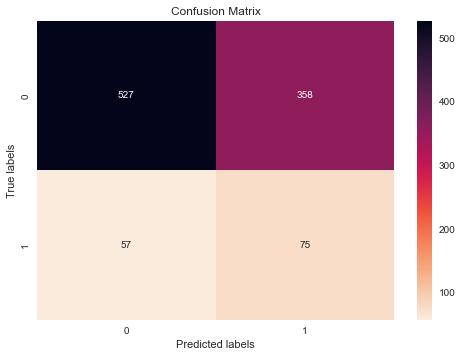

In [58]:
KNN_CM = confusion_matrix(Y_test, KNN_grid_y_pred)
ax= plt.subplot()
sns.heatmap(KNN_CM, annot=True, fmt='g',cmap='rocket_r');#cmap='rocket_r' for color inverse of the scale
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [59]:
print(classification_report(Y_test,KNN_grid_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.60      0.72       885
           1       0.17      0.57      0.27       132

    accuracy                           0.59      1017
   macro avg       0.54      0.58      0.49      1017
weighted avg       0.81      0.59      0.66      1017



In [60]:
from sklearn import metrics
KNN_Proba_score_positive_class= KNN.predict_proba(X_test)[:,1]
KNN_Proba_score_positive_class 

array([0.        , 0.7362821 , 0.78924466, ..., 0.88160955, 0.        ,
       0.7759932 ])

In [61]:
fpr2, tpr2, thresholds2 = metrics.roc_curve(Y_test, KNN_Proba_score_positive_class, pos_label=1)
print("FPR",fpr2)
print("TPR",tpr2)
print("thresholds",thresholds2)

FPR [0.         0.01694915 0.01694915 0.02033898 0.02033898 0.02146893
 0.02146893 0.02485876 0.02485876 0.03502825 0.03502825 0.03728814
 0.03728814 0.03954802 0.03954802 0.04067797 0.04067797 0.04293785
 0.04293785 0.04745763 0.04745763 0.04971751 0.04971751 0.05423729
 0.05423729 0.05649718 0.05649718 0.06666667 0.06666667 0.07570621
 0.07570621 0.07909605 0.07909605 0.08474576 0.08474576 0.08700565
 0.08700565 0.10169492 0.10169492 0.1039548  0.1039548  0.11412429
 0.11412429 0.11525424 0.11525424 0.11751412 0.11751412 0.11864407
 0.11864407 0.12881356 0.12881356 0.13785311 0.13785311 0.15819209
 0.15819209 0.15932203 0.15932203 0.16723164 0.16723164 0.17853107
 0.17853107 0.1819209  0.1819209  0.18757062 0.18757062 0.21129944
 0.21129944 0.22033898 0.22033898 0.22937853 0.22937853 0.23276836
 0.23276836 0.24067797 0.24067797 0.25423729 0.25423729 0.25536723
 0.25536723 0.25875706 0.25875706 0.26440678 0.26440678 0.26666667
 0.26666667 0.2700565  0.2700565  0.27457627 0.27457627 0.

In [62]:
from sklearn.metrics import roc_auc_score
KNN_auc_score = roc_auc_score(Y_test, KNN_Proba_score_positive_class)
print("AUC SCORE:",KNN_auc_score)

AUC SCORE: 0.6201549392227359


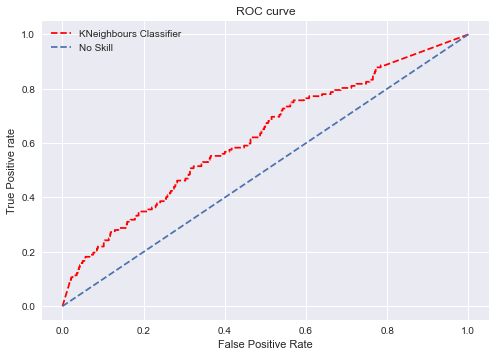

In [63]:
plt.style.use('seaborn')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='KNeighbours Classifier')
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC', dpi=300)
plt.show()

# SUPPORT VECTOR MACHINE

In [64]:
from sklearn.svm import SVC
SVM_param_rand = {'C': [0.1, 1, 10, 100, 1000], 
                  'gamma': [0.1,0.01,0.001,0.0001], 
                  'kernel': ['rbf']} 

SVM = GridSearchCV(SVC(),
                        SVM_param_rand)

In [65]:
SVM.fit(X_train_smote,Y_train_smote)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [66]:
SVM.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

In [67]:
SVM.best_estimator_

SVC(C=1000, gamma=0.1)

In [68]:
SVM_grid_ytrain_pred = SVM.predict(X_train)
print("SVM Training Accuracy:",accuracy_score(Y_train, SVM_grid_ytrain_pred))
SVM_grid_y_pred = SVM.predict(X_test)
print("SVM Testing Accuracy:",accuracy_score(Y_test, SVM_grid_y_pred))

SVM Training Accuracy: 0.9873577749683944
SVM Testing Accuracy: 0.7551622418879056


In [69]:
from sklearn.model_selection import cross_val_score
SVM_CVS_TRAIN = cross_val_score(estimator = SVM, X = X_train_smote, y = Y_train_smote, cv = 10)
print("After cross validation the accuracy in SVM Classifier is:",SVM_CVS_TRAIN.mean())

After cross validation the accuracy in SVM Classifier is: 0.8889201647334417


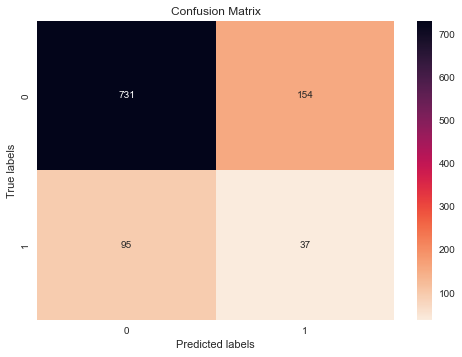

In [70]:
SVM_CM = confusion_matrix(Y_test, SVM_grid_y_pred)
ax= plt.subplot()
sns.heatmap(SVM_CM, annot=True, fmt='g',cmap='rocket_r');#cmap='rocket_r' for color inverse of the scale
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [71]:
print(classification_report(Y_test,SVM_grid_y_pred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       885
           1       0.19      0.28      0.23       132

    accuracy                           0.76      1017
   macro avg       0.54      0.55      0.54      1017
weighted avg       0.80      0.76      0.77      1017



# DECISION TREE CLASSIFIER

In [72]:
from sklearn.tree import DecisionTreeClassifier
DTC_param_grid = {"criterion":["gini","entropy"],
                  "max_depth": range(1,10),
                  "min_samples_split":range(1,10),
                  'min_samples_leaf':range(1,20)}

DTC = GridSearchCV(DecisionTreeClassifier(),
                   DTC_param_grid)

In [73]:
DTC.fit(X_train_smote,Y_train_smote)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 20),
                         'min_samples_split': range(1, 10)})

In [74]:
DTC.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [75]:
DTC.best_estimator_

DecisionTreeClassifier(max_depth=9, min_samples_split=5)

In [76]:
DTC_grid_ytrain_pred = DTC.predict(X_train)
print("Decision Tree Training Accuracy:",accuracy_score(Y_train, DTC_grid_ytrain_pred))
DTC_grid_y_pred = DTC.predict(X_test)
print("Decision Tree Testing Accuracy:",accuracy_score(Y_test, DTC_grid_y_pred))

Decision Tree Training Accuracy: 0.8103666245259166
Decision Tree Testing Accuracy: 0.6637168141592921


In [77]:
from sklearn.model_selection import cross_val_score
DTC_CVS_TRAIN = cross_val_score(estimator = DTC, X = X_train_smote, y = Y_train_smote, cv = 10)
print("After cross validation the accuracy in DT Classifier is:",DTC_CVS_TRAIN.mean())

After cross validation the accuracy in DT Classifier is: 0.7402224153348195


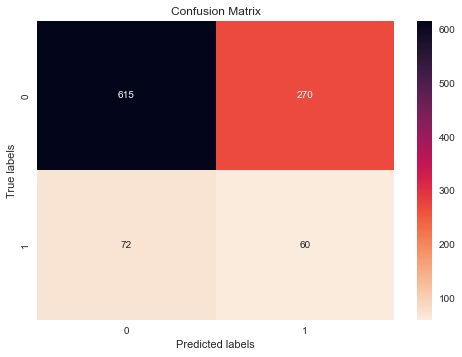

In [78]:
DTC_CM = confusion_matrix(Y_test, DTC_grid_y_pred)
ax= plt.subplot()
sns.heatmap(DTC_CM, annot=True, fmt='g',cmap='rocket_r');#cmap='rocket_r' for color inverse of the scale
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [79]:
print(classification_report(Y_test,DTC_grid_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78       885
           1       0.18      0.45      0.26       132

    accuracy                           0.66      1017
   macro avg       0.54      0.57      0.52      1017
weighted avg       0.80      0.66      0.71      1017



In [80]:
from sklearn import metrics
DTC_Proba_score_positive_class= DTC.predict_proba(X_test)[:,1]
DTC_Proba_score_positive_class 

array([0.        , 1.        , 0.33333333, ..., 0.16666667, 0.21782178,
       0.87335092])

In [81]:
fpr3, tpr3, thresholds3 = metrics.roc_curve(Y_test, DTC_Proba_score_positive_class, pos_label=1)
print("FPR",fpr3)
print("TPR",tpr3)
print("thresholds",thresholds3)

FPR [0.         0.04971751 0.05423729 0.06214689 0.06327684 0.09378531
 0.09717514 0.09943503 0.10734463 0.11864407 0.13220339 0.13785311
 0.15932203 0.17175141 0.17288136 0.2079096  0.21016949 0.21355932
 0.21581921 0.22711864 0.23841808 0.28474576 0.29378531 0.30508475
 0.31751412 0.3220339  0.32542373 0.37514124 0.39096045 0.39887006
 0.41694915 0.44180791 0.45988701 0.46666667 0.47118644 0.4779661
 0.52881356 0.56384181 0.56497175 0.56949153 0.5740113  0.58870056
 0.58983051 0.59661017 0.60903955 0.61694915 0.63615819 0.64632768
 0.64971751 0.66327684 0.68813559 1.        ]
TPR [0.         0.04545455 0.06060606 0.06060606 0.06060606 0.13636364
 0.15151515 0.15909091 0.15909091 0.20454545 0.21969697 0.22727273
 0.23484848 0.27272727 0.28030303 0.34848485 0.34848485 0.34848485
 0.35606061 0.36363636 0.39393939 0.43181818 0.45454545 0.45454545
 0.47727273 0.47727273 0.48484848 0.50757576 0.56060606 0.56060606
 0.57575758 0.59090909 0.62121212 0.65151515 0.65151515 0.65151515
 0.674242

In [82]:
from sklearn.metrics import roc_auc_score
DTC_auc_score = roc_auc_score(Y_test, DTC_Proba_score_positive_class)
print("AUC SCORE:",DTC_auc_score)

AUC SCORE: 0.5960965588084232


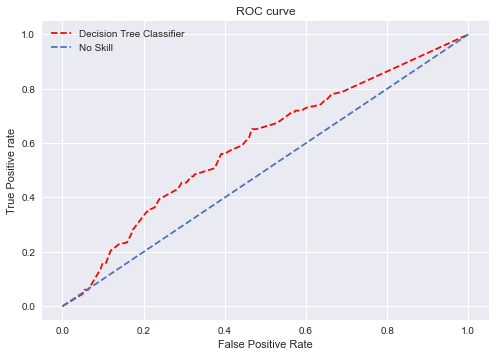

In [83]:
plt.style.use('seaborn')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Decision Tree Classifier')
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC', dpi=300)
plt.show()

# RANDOM FOREST CLASSIFIER

In [84]:
from sklearn.ensemble import RandomForestClassifier    
RFC_param_grid = {'n_estimators': [10,80,200,800,2000,5000], 
                  'max_features': ['sqrt', 'log2'],
                  'max_depth': [10,20,30,40,50,100],
                  'min_samples_split': [2,5,10,20],
                  'min_samples_leaf': [1,2,7,15]} 

RFC = RandomizedSearchCV(RandomForestClassifier(),
                        RFC_param_grid,
                        n_iter=40,
                        n_jobs= -1)

In [85]:
RFC.fit(X_train_smote,Y_train_smote)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=40, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 100],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 7, 15],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'n_estimators': [10, 80, 200, 800, 2000,
                                                         5000]})

In [86]:
RFC.best_params_

{'n_estimators': 2000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50}

In [87]:
DTC.best_estimator_

DecisionTreeClassifier(max_depth=9, min_samples_split=5)

In [88]:
RFC_grid_ytrain_pred = RFC.predict(X_train)
print("Random Forest Training Accuracy:",accuracy_score(Y_train, RFC_grid_ytrain_pred))
RFC_grid_y_pred = RFC.predict(X_test)
print("Random Forest Testing Accuracy:",accuracy_score(Y_test, RFC_grid_y_pred))

Random Forest Training Accuracy: 1.0
Random Forest Testing Accuracy: 0.7944936086529006


In [89]:
from sklearn.model_selection import cross_val_score
RFC_CVS_TRAIN = cross_val_score(estimator = RFC, X = X_train_smote, y = Y_train_smote, cv = 10)
print("After cross validation the accuracy in RF Classifier is:",RFC_CVS_TRAIN.mean())

After cross validation the accuracy in RF Classifier is: 0.9002071762320373


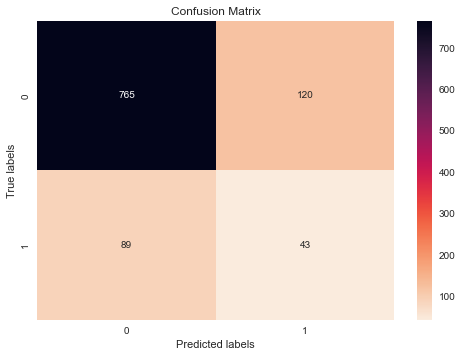

In [90]:
RFC_CM = confusion_matrix(Y_test, RFC_grid_y_pred)
ax= plt.subplot()
sns.heatmap(RFC_CM, annot=True, fmt='g',cmap='rocket_r');#cmap='rocket_r' for color inverse of the scale
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [91]:
print(classification_report(Y_test,RFC_grid_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       885
           1       0.26      0.33      0.29       132

    accuracy                           0.79      1017
   macro avg       0.58      0.60      0.59      1017
weighted avg       0.81      0.79      0.80      1017



In [92]:
from sklearn import metrics
RFC_Proba_score_positive_class= RFC.predict_proba(X_test)[:,1]
RFC_Proba_score_positive_class 

array([0.152 , 0.3095, 0.506 , ..., 0.3255, 0.2   , 0.6135])

In [93]:
fpr4, tpr4, thresholds4 = metrics.roc_curve(Y_test, RFC_Proba_score_positive_class, pos_label=1)
print("FPR",fpr4)
print("TPR",tpr4)
print("thresholds",thresholds4)

FPR [0.         0.         0.00112994 0.00112994 0.00225989 0.00338983
 0.00564972 0.00564972 0.00677966 0.00677966 0.0079096  0.00903955
 0.00903955 0.01016949 0.01242938 0.01694915 0.01694915 0.0180791
 0.0180791  0.01920904 0.01920904 0.02033898 0.02033898 0.02711864
 0.02711864 0.02937853 0.03163842 0.03502825 0.03502825 0.03615819
 0.03615819 0.03728814 0.03841808 0.03954802 0.04293785 0.04519774
 0.04519774 0.05310734 0.05536723 0.05536723 0.05762712 0.06214689
 0.06666667 0.06666667 0.07231638 0.07231638 0.07344633 0.07457627
 0.07570621 0.07570621 0.0779661  0.08248588 0.08248588 0.08361582
 0.08361582 0.08587571 0.08700565 0.08813559 0.09039548 0.09152542
 0.09265537 0.0960452  0.09717514 0.09717514 0.09943503 0.09943503
 0.10056497 0.10282486 0.10508475 0.10508475 0.10960452 0.12090395
 0.12316384 0.12429379 0.12655367 0.13220339 0.13220339 0.13220339
 0.13220339 0.13333333 0.13333333 0.13559322 0.13785311 0.14011299
 0.14124294 0.1480226  0.15028249 0.15141243 0.15141243 0.1

In [94]:
from sklearn.metrics import roc_auc_score
RFC_auc_score = roc_auc_score(Y_test, RFC_Proba_score_positive_class)
print("AUC SCORE:",RFC_auc_score)

AUC SCORE: 0.6715117274439308


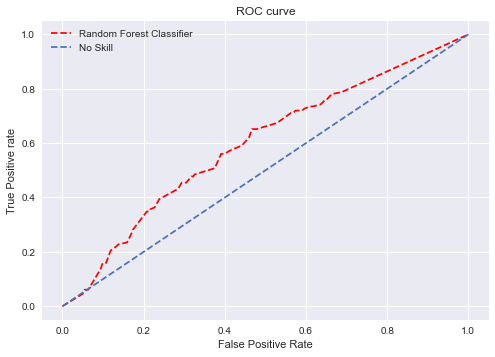

In [95]:
plt.style.use('seaborn')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Random Forest Classifier')
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC', dpi=300)
plt.show()

# BAGGING CLASSIFIER

In [96]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
BAG_param_grid = {'base_estimator__max_depth' : [1, 2, 3, 4, 5],
                  'max_samples' : [0.05, 0.1, 0.2, 0.5]}
BAG = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(),
                                           n_estimators = 100, max_features = 0.5),
                                           BAG_param_grid)

In [97]:
BAG.fit(X_train_smote,Y_train_smote)

GridSearchCV(estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                         max_features=0.5, n_estimators=100),
             param_grid={'base_estimator__max_depth': [1, 2, 3, 4, 5],
                         'max_samples': [0.05, 0.1, 0.2, 0.5]})

In [98]:
BAG.best_params_

{'base_estimator__max_depth': 5, 'max_samples': 0.5}

In [99]:
BAG.best_estimator_

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  max_features=0.5, max_samples=0.5, n_estimators=100)

In [100]:
BAG_grid_ytrain_pred = BAG.predict(X_train)
print("Bagging Training Accuracy:",accuracy_score(Y_train, BAG_grid_ytrain_pred))
BAG_grid_y_pred = BAG.predict(X_test)
print("Bagging Testing Accuracy:",accuracy_score(Y_test, BAG_grid_y_pred))

Bagging Training Accuracy: 0.7416772018541931
Bagging Testing Accuracy: 0.6873156342182891


In [101]:
from sklearn.model_selection import cross_val_score
BAG_CVS_TRAIN = cross_val_score(estimator = BAG, X = X_train_smote, y = Y_train_smote, cv = 10)
print("After cross validation the accuracy in Bagging Classifier is:",BAG_CVS_TRAIN.mean())

After cross validation the accuracy in Bagging Classifier is: 0.7389856550925051


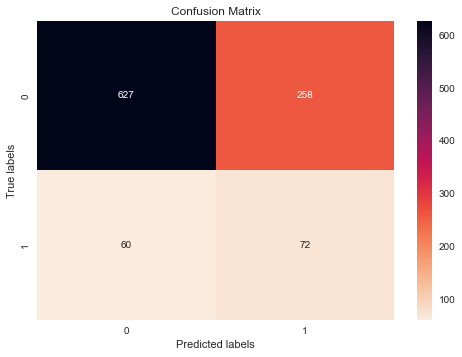

In [102]:
BAG_CM = confusion_matrix(Y_test, BAG_grid_y_pred)
ax= plt.subplot()
sns.heatmap(BAG_CM, annot=True, fmt='g',cmap='rocket_r');#cmap='rocket_r' for color inverse of the scale
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [103]:
print(classification_report(Y_test,BAG_grid_y_pred))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80       885
           1       0.22      0.55      0.31       132

    accuracy                           0.69      1017
   macro avg       0.57      0.63      0.55      1017
weighted avg       0.82      0.69      0.73      1017



In [104]:
from sklearn import metrics
BAG_Proba_score_positive_class= BAG.predict_proba(X_test)[:,1]
BAG_Proba_score_positive_class 

array([0.2983313 , 0.43707075, 0.59884316, ..., 0.49315746, 0.38093507,
       0.58294703])

In [105]:
fpr5, tpr5, thresholds5 = metrics.roc_curve(Y_test, BAG_Proba_score_positive_class, pos_label=1)
print("FPR",fpr5)
print("TPR",tpr5)
print("thresholds",thresholds5)

FPR [0.         0.         0.         0.00112994 0.00112994 0.00225989
 0.00225989 0.00338983 0.00338983 0.00677966 0.00677966 0.0079096
 0.0079096  0.01129944 0.01129944 0.01242938 0.01242938 0.01355932
 0.01355932 0.01581921 0.01581921 0.02937853 0.02937853 0.03276836
 0.03276836 0.03389831 0.03389831 0.03615819 0.03615819 0.04180791
 0.04180791 0.04632768 0.04632768 0.04745763 0.04745763 0.04971751
 0.04971751 0.05649718 0.05649718 0.05762712 0.05762712 0.05988701
 0.05988701 0.06101695 0.06101695 0.06327684 0.06327684 0.06892655
 0.06892655 0.07231638 0.07231638 0.08022599 0.08022599 0.08135593
 0.08135593 0.08474576 0.08474576 0.08587571 0.08587571 0.08700565
 0.08700565 0.08813559 0.08813559 0.10169492 0.10169492 0.10621469
 0.10621469 0.11073446 0.11073446 0.11412429 0.11412429 0.11638418
 0.11638418 0.11864407 0.11864407 0.12429379 0.12429379 0.13107345
 0.13107345 0.14011299 0.14011299 0.15028249 0.15028249 0.15367232
 0.15367232 0.16158192 0.16158192 0.16271186 0.16271186 0.1

In [106]:
from sklearn.metrics import roc_auc_score
BAG_auc_score = roc_auc_score(Y_test, BAG_Proba_score_positive_class)
print("AUC SCORE:",BAG_auc_score)

AUC SCORE: 0.7027050162643383


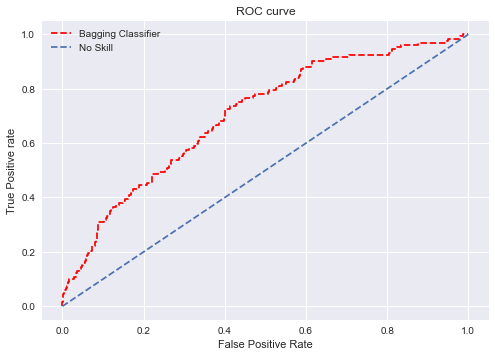

In [107]:
plt.style.use('seaborn')
plt.plot(fpr5, tpr5, linestyle='--',color='red', label='Bagging Classifier')
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC', dpi=300)
plt.show()

# EXTRA TREES CLASSIFIER

In [108]:
from sklearn.ensemble import ExtraTreesClassifier
ETC_param_grid = {"criterion":["gini","entropy"],
                  "max_depth": range(1,10),
                  "min_samples_split":range(1,10),
                  "max_features":["auto", "sqrt", "log2"]
                }
ETC = GridSearchCV(ExtraTreesClassifier(),
                        ETC_param_grid)

In [109]:
ETC.fit(X_train_smote,Y_train_smote)

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': range(1, 10)})

In [110]:
ETC.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'log2',
 'min_samples_split': 6}

In [111]:
ETC.best_estimator_

ExtraTreesClassifier(max_depth=9, max_features='log2', min_samples_split=6)

In [112]:
ETC_grid_ytrain_pred = ETC.predict(X_train)
print("Extra Tree Training Accuracy:",accuracy_score(Y_train, ETC_grid_ytrain_pred))
ETC_grid_y_pred = ETC.predict(X_test)
print("Extra Testing Accuracy:",accuracy_score(Y_test, ETC_grid_y_pred))

Extra Tree Training Accuracy: 0.7673830594184576
Extra Testing Accuracy: 0.7050147492625368


In [113]:
from sklearn.model_selection import cross_val_score
ETC_CVS_TRAIN = cross_val_score(estimator = ETC, X = X_train_smote, y = Y_train_smote, cv = 10)
print("After cross validation the accuracy in Extra Tree Classifier is:",ETC_CVS_TRAIN.mean())

After cross validation the accuracy in Extra Tree Classifier is: 0.7191735620458181


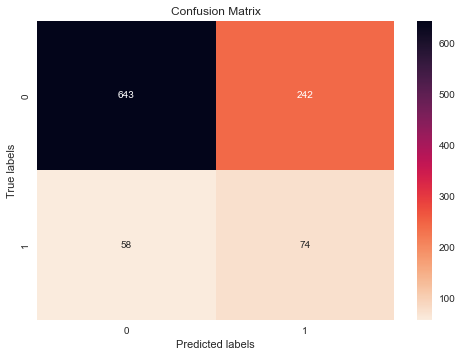

In [114]:
ETC_CM = confusion_matrix(Y_test, ETC_grid_y_pred)
ax= plt.subplot()
sns.heatmap(ETC_CM, annot=True, fmt='g',cmap='rocket_r');#cmap='rocket_r' for color inverse of the scale
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [115]:
print(classification_report(Y_test,ETC_grid_y_pred))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81       885
           1       0.23      0.56      0.33       132

    accuracy                           0.71      1017
   macro avg       0.58      0.64      0.57      1017
weighted avg       0.83      0.71      0.75      1017



In [116]:
from sklearn import metrics
ETC_Proba_score_positive_class= ETC.predict_proba(X_test)[:,1]
ETC_Proba_score_positive_class 

array([0.27669054, 0.49450208, 0.62040889, ..., 0.51836141, 0.35149445,
       0.6174033 ])

In [117]:
fpr6, tpr6, thresholds6 = metrics.roc_curve(Y_test, ETC_Proba_score_positive_class, pos_label=1)
print("FPR",fpr6)
print("TPR",tpr6)
print("thresholds",thresholds6)

FPR [0.         0.         0.         0.00112994 0.00112994 0.00225989
 0.00225989 0.00564972 0.00564972 0.01016949 0.01016949 0.01242938
 0.01242938 0.01920904 0.01920904 0.02033898 0.02033898 0.02937853
 0.02937853 0.03276836 0.03276836 0.03389831 0.03389831 0.03841808
 0.03841808 0.0440678  0.0440678  0.04519774 0.04519774 0.04632768
 0.04632768 0.05536723 0.05536723 0.05875706 0.05875706 0.05988701
 0.05988701 0.06101695 0.06101695 0.06779661 0.06779661 0.07231638
 0.07231638 0.0779661  0.0779661  0.08022599 0.08022599 0.08248588
 0.08248588 0.09265537 0.09265537 0.09830508 0.09830508 0.09943503
 0.09943503 0.10621469 0.10621469 0.10734463 0.10734463 0.10960452
 0.10960452 0.11073446 0.11073446 0.11864407 0.11864407 0.12316384
 0.12316384 0.13220339 0.13220339 0.14915254 0.14915254 0.15141243
 0.15141243 0.15706215 0.15706215 0.15819209 0.15819209 0.15932203
 0.15932203 0.16610169 0.16610169 0.1819209  0.1819209  0.18531073
 0.18531073 0.19322034 0.19322034 0.21694915 0.21694915 0.

In [118]:
from sklearn.metrics import roc_auc_score
ETC_auc_score = roc_auc_score(Y_test, ETC_Proba_score_positive_class)
print("AUC SCORE:",ETC_auc_score)

AUC SCORE: 0.7099811676082862


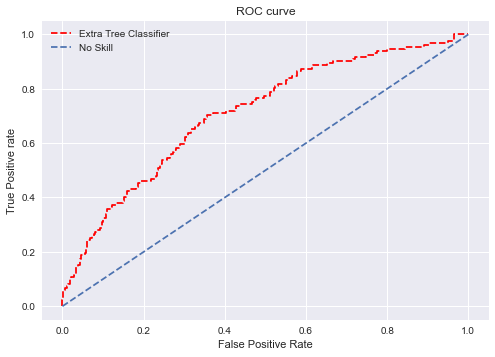

In [119]:
plt.style.use('seaborn')
plt.plot(fpr6, tpr6, linestyle='--',color='red', label='Extra Tree Classifier')
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC', dpi=300)
plt.show()

# ADA BOOSTING

In [120]:
from sklearn.ensemble import AdaBoostClassifier
ADA_param_grid = {'algorithm': ['SAMME', 'SAMME.R'],
                  'n_estimators' : [50,100]
                 }
ADA = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(max_depth= 1)),
                         ADA_param_grid)

In [121]:
ADA.fit(X_train_smote,Y_train_smote)

GridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1)),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'n_estimators': [50, 100]})

In [122]:
ADA.best_params_

{'algorithm': 'SAMME.R', 'n_estimators': 100}

In [123]:
ADA.best_estimator_

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=100)

In [124]:
ADA_grid_ytrain_pred = ADA.predict(X_train)
print("ADA Boosting Training Accuracy:",accuracy_score(Y_train, ADA_grid_ytrain_pred))
ADA_grid_y_pred = ADA.predict(X_test)
print("ADA Bosting Testing Accuracy:",accuracy_score(Y_test, ADA_grid_y_pred))

ADA Boosting Training Accuracy: 0.7383059418457648
ADA Bosting Testing Accuracy: 0.7059980334316618


In [125]:
from sklearn.model_selection import cross_val_score
ADA_CVS_TRAIN = cross_val_score(estimator = ADA, X = X_train_smote, y = Y_train_smote, cv = 10)
print("After cross validation the accuracy in ADA Classifier is:",ADA_CVS_TRAIN.mean())

After cross validation the accuracy in ADA Classifier is: 0.7475145149305424


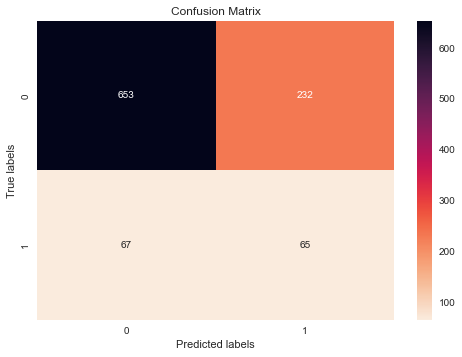

In [126]:
ADA_CM = confusion_matrix(Y_test, ADA_grid_y_pred)
ax= plt.subplot()
sns.heatmap(ADA_CM, annot=True, fmt='g',cmap='rocket_r');#cmap='rocket_r' for color inverse of the scale
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [127]:
print(classification_report(Y_test,ADA_grid_y_pred))

              precision    recall  f1-score   support

           0       0.91      0.74      0.81       885
           1       0.22      0.49      0.30       132

    accuracy                           0.71      1017
   macro avg       0.56      0.62      0.56      1017
weighted avg       0.82      0.71      0.75      1017



In [128]:
from sklearn import metrics
ADA_Proba_score_positive_class= ADA.predict_proba(X_test)[:,1]
ADA_Proba_score_positive_class 

array([0.49603102, 0.50455992, 0.50106088, ..., 0.49751194, 0.49485158,
       0.50350368])

In [129]:
fpr7, tpr7, thresholds7 = metrics.roc_curve(Y_test, ADA_Proba_score_positive_class, pos_label=1)
print("FPR",fpr7)
print("TPR",tpr7)
print("thresholds",thresholds7)

FPR [0.         0.         0.         0.00338983 0.00338983 0.00451977
 0.00451977 0.01129944 0.01129944 0.02033898 0.02033898 0.02146893
 0.02146893 0.02259887 0.02259887 0.02485876 0.02485876 0.03050847
 0.03050847 0.03163842 0.03163842 0.04067797 0.04067797 0.04180791
 0.04180791 0.05762712 0.05762712 0.06101695 0.06101695 0.06666667
 0.06666667 0.07570621 0.07570621 0.08022599 0.08022599 0.08361582
 0.08361582 0.08587571 0.08587571 0.09039548 0.09039548 0.10282486
 0.10282486 0.10621469 0.10621469 0.10960452 0.10960452 0.11073446
 0.11073446 0.11412429 0.11412429 0.12542373 0.12542373 0.12768362
 0.12768362 0.14463277 0.14463277 0.15254237 0.15254237 0.15367232
 0.15367232 0.15706215 0.15706215 0.16158192 0.16158192 0.16723164
 0.16723164 0.17062147 0.17062147 0.17288136 0.17288136 0.1740113
 0.1740113  0.17514124 0.17514124 0.17627119 0.17627119 0.17740113
 0.18870056 0.18870056 0.18983051 0.18983051 0.1920904  0.1920904
 0.19322034 0.19435028 0.19435028 0.20112994 0.20112994 0.20

In [130]:
from sklearn.metrics import roc_auc_score
ADA_auc_score = roc_auc_score(Y_test, ADA_Proba_score_positive_class)
print("AUC SCORE:",ADA_auc_score)

AUC SCORE: 0.6658662900188326


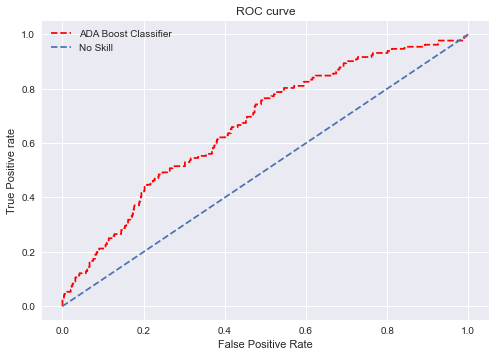

In [131]:
plt.style.use('seaborn')
plt.plot(fpr7, tpr7, linestyle='--',color='red', label='ADA Boost Classifier')
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC', dpi=300)
plt.show()

# Gradient Boosting

In [132]:
from sklearn.ensemble import GradientBoostingClassifier
GBC_param_grid = {'n_estimators': [10,80,200,800,2000,5000], 
                  'max_features': ['sqrt', 'log2'],
                  'max_depth': [10,20,30,40,50,100],
                  'min_samples_split': [2,5,10,20],
                  'min_samples_leaf': [1,2,7,15],
                  'loss': ['deviance', 'exponential'],
                  'learning_rate':[0.01,0.1,0.5],
                  'subsample':[0.7, 0.8,0.9, 1]} 

GBC = RandomizedSearchCV(GradientBoostingClassifier(),
                        GBC_param_grid,
                        n_jobs= -1)

In [133]:
GBC.fit(X_train_smote,Y_train_smote)

RandomizedSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.5],
                                        'loss': ['deviance', 'exponential'],
                                        'max_depth': [10, 20, 30, 40, 50, 100],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 7, 15],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'n_estimators': [10, 80, 200, 800, 2000,
                                                         5000],
                                        'subsample': [0.7, 0.8, 0.9, 1]})

In [134]:
GBC.best_params_

{'subsample': 0.9,
 'n_estimators': 2000,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 20,
 'loss': 'deviance',
 'learning_rate': 0.1}

In [135]:
GBC.best_estimator_

GradientBoostingClassifier(max_depth=20, max_features='log2',
                           min_samples_split=10, n_estimators=2000,
                           subsample=0.9)

In [136]:
GBC_grid_ytrain_pred = GBC.predict(X_train)
print("Gradient Boosting Training Accuracy:",accuracy_score(Y_train, GBC_grid_ytrain_pred))
GBC_grid_y_pred = GBC.predict(X_test)
print("Gradient Boosting Testing Accuracy:",accuracy_score(Y_test, GBC_grid_y_pred))

Gradient Boosting Training Accuracy: 1.0
Gradient Boosting Testing Accuracy: 0.8308751229105211


In [137]:
from sklearn.model_selection import cross_val_score
GBC_CVS_TRAIN = cross_val_score(estimator = GBC, X = X_train_smote, y = Y_train_smote, cv = 10)
print("After cross validation the accuracy in Gradient Boosting Classifier is:",GBC_CVS_TRAIN.mean())

After cross validation the accuracy in Gradient Boosting Classifier is: 0.9217780632485736


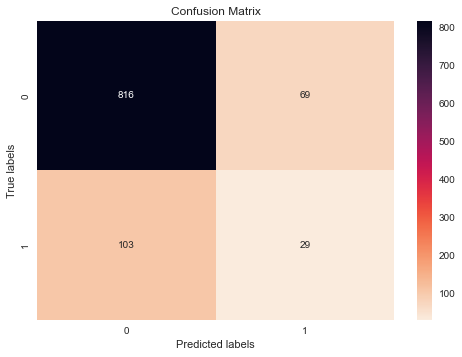

In [138]:
GBC_CM = confusion_matrix(Y_test, GBC_grid_y_pred)
ax= plt.subplot()
sns.heatmap(GBC_CM, annot=True, fmt='g',cmap='rocket_r');#cmap='rocket_r' for color inverse of the scale
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [139]:
print(classification_report(Y_test,GBC_grid_y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       885
           1       0.30      0.22      0.25       132

    accuracy                           0.83      1017
   macro avg       0.59      0.57      0.58      1017
weighted avg       0.81      0.83      0.82      1017



In [140]:
from sklearn import metrics
GBC_Proba_score_positive_class= GBC.predict_proba(X_test)[:,1]
GBC_Proba_score_positive_class 

array([8.38464628e-07, 1.00750386e-03, 9.45247516e-02, ...,
       2.52043823e-03, 2.27922572e-06, 2.44603701e-02])

In [141]:
fpr8, tpr8, thresholds8 = metrics.roc_curve(Y_test, GBC_Proba_score_positive_class, pos_label=1)
print("FPR",fpr8)
print("TPR",tpr8)
print("thresholds",thresholds8)

FPR [0.         0.         0.00112994 0.00112994 0.00338983 0.00338983
 0.0079096  0.0079096  0.00903955 0.00903955 0.01355932 0.01355932
 0.01468927 0.01468927 0.0180791  0.0180791  0.02485876 0.02485876
 0.0259887  0.0259887  0.02824859 0.02824859 0.04519774 0.04519774
 0.04745763 0.04745763 0.05084746 0.05084746 0.05423729 0.05423729
 0.06101695 0.06101695 0.06214689 0.06214689 0.06553672 0.06553672
 0.06779661 0.06779661 0.0700565  0.0700565  0.07457627 0.07457627
 0.11299435 0.11299435 0.11525424 0.11525424 0.12316384 0.12316384
 0.12429379 0.12429379 0.12881356 0.12881356 0.13220339 0.13220339
 0.13333333 0.13333333 0.13672316 0.13672316 0.13898305 0.13898305
 0.14689266 0.14689266 0.16045198 0.16045198 0.16497175 0.16497175
 0.16949153 0.16949153 0.17514124 0.17514124 0.18531073 0.18531073
 0.19096045 0.19096045 0.2        0.2        0.20112994 0.20112994
 0.20564972 0.20564972 0.20677966 0.20677966 0.21129944 0.21129944
 0.21581921 0.21581921 0.22824859 0.22824859 0.23502825 0.

In [142]:
from sklearn.metrics import roc_auc_score
GBC_auc_score = roc_auc_score(Y_test, GBC_Proba_score_positive_class)
print("AUC SCORE:",GBC_auc_score)

AUC SCORE: 0.6437510700222564


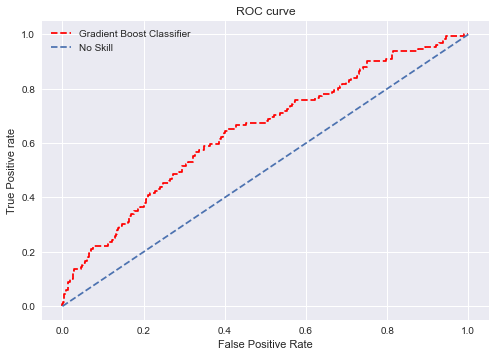

In [143]:
plt.style.use('seaborn')
plt.plot(fpr8, tpr8, linestyle='--',color='red', label='Gradient Boost Classifier')
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC', dpi=300)
plt.show()

# XGBoost

In [144]:
from xgboost import XGBClassifier
XGB_param_grid = {'n_estimators': [10,80,200,800,2000,5000], 
                  'max_depth': [10,20,30,40,50,100],
                  'learning_rate':[0.01,0.1,0.5]} 

XGB = RandomizedSearchCV(XGBClassifier(),
                        GBC_param_grid)

In [145]:
XGB.fit(X_train_smote,Y_train_smote)

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                

In [146]:
XGB.best_params_

{'subsample': 0.7,
 'n_estimators': 2000,
 'min_samples_split': 20,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 100,
 'loss': 'deviance',
 'learning_rate': 0.01}

In [147]:
XGB.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, loss='deviance',
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=100, max_features='sqrt',
              max_leaves=None, min_child_weight=None, min_samples_leaf=1,
              min_samples_split=20, missing=nan, monotone_constraints=None,
              multi_strategy=None, ...)

In [148]:
XGB_grid_ytrain_pred = XGB.predict(X_train)
print("XGBoost Training Accuracy:",accuracy_score(Y_train, XGB_grid_ytrain_pred))
XGB_grid_y_pred = XGB.predict(X_test)
print("XGBoost Testing Accuracy:",accuracy_score(Y_test, XGB_grid_y_pred))

XGBoost Training Accuracy: 1.0
XGBoost Testing Accuracy: 0.7974434611602753


In [149]:
from sklearn.model_selection import cross_val_score
XGB_CVS_TRAIN = cross_val_score(estimator = XGB, X = X_train_smote, y = Y_train_smote, cv = 10)
print("After cross validation the accuracy in XGBoost Classifier is:",XGB_CVS_TRAIN.mean())

After cross validation the accuracy in XGBoost Classifier is: 0.8942015843629173


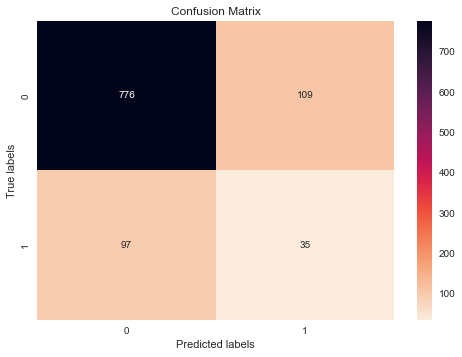

In [150]:
XGB_CM = confusion_matrix(Y_test, XGB_grid_y_pred)
ax= plt.subplot()
sns.heatmap(XGB_CM, annot=True, fmt='g',cmap='rocket_r');#cmap='rocket_r' for color inverse of the scale
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [151]:
print(classification_report(Y_test,XGB_grid_y_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       885
           1       0.24      0.27      0.25       132

    accuracy                           0.80      1017
   macro avg       0.57      0.57      0.57      1017
weighted avg       0.81      0.80      0.80      1017



In [152]:
from sklearn import metrics
XGB_Proba_score_positive_class= XGB.predict_proba(X_test)[:,1]
XGB_Proba_score_positive_class 

array([0.01220434, 0.29846215, 0.62926084, ..., 0.12804496, 0.02870362,
       0.43142053], dtype=float32)

In [153]:
fpr9, tpr9, thresholds9 = metrics.roc_curve(Y_test, XGB_Proba_score_positive_class, pos_label=1)
print("FPR",fpr9)
print("TPR",tpr9)
print("thresholds",thresholds9)

FPR [0.         0.         0.         0.00112994 0.00112994 0.00225989
 0.00225989 0.00451977 0.00451977 0.00564972 0.00564972 0.00677966
 0.00677966 0.00903955 0.00903955 0.01016949 0.01016949 0.01694915
 0.01694915 0.02711864 0.02711864 0.02824859 0.02824859 0.03389831
 0.03389831 0.03502825 0.03502825 0.03841808 0.03841808 0.0440678
 0.0440678  0.05310734 0.05310734 0.05988701 0.05988701 0.06440678
 0.06440678 0.07457627 0.07457627 0.07683616 0.07683616 0.08361582
 0.08361582 0.09265537 0.09265537 0.0960452  0.0960452  0.09717514
 0.09717514 0.10169492 0.10169492 0.10734463 0.10734463 0.10847458
 0.10847458 0.10960452 0.10960452 0.11412429 0.11412429 0.12429379
 0.12429379 0.12881356 0.12881356 0.1299435  0.1299435  0.13333333
 0.13333333 0.13559322 0.13559322 0.13898305 0.13898305 0.15480226
 0.15480226 0.1559322  0.1559322  0.16836158 0.16836158 0.17062147
 0.17062147 0.17175141 0.17175141 0.17514124 0.17514124 0.18418079
 0.18418079 0.19887006 0.19887006 0.21694915 0.21694915 0.2

In [154]:
from sklearn.metrics import roc_auc_score
XGB_auc_score = roc_auc_score(Y_test, XGB_Proba_score_positive_class)
print("AUC SCORE:",XGB_auc_score)

AUC SCORE: 0.6490070193460024


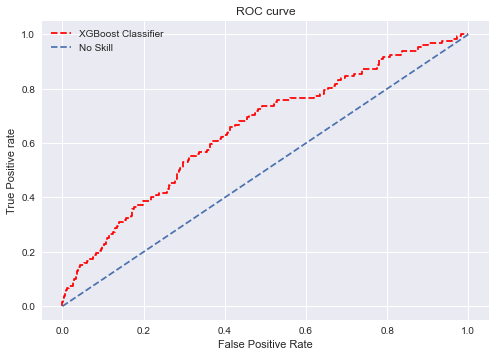

In [155]:
plt.style.use('seaborn')
plt.plot(fpr9, tpr9, linestyle='--',color='red', label='XGBoost Classifier')
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC', dpi=300)
plt.show()

# FINAL RESULTS

In [156]:
evaluate(LRM, X_train_smote, X_test, Y_train_smote, Y_test) #LOGISTIC REGRESSION

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1349  645]
 [ 643 1351]]
ACCURACY SCORE:
0.6770
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.677209     0.676854  0.677031     0.677031      0.677031
recall        0.676530     0.677533  0.677031     0.677031      0.677031
f1-score      0.676869     0.677193  0.677031     0.677031      0.677031
support    1994.000000  1994.000000  0.677031  3988.000000   3988.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[581 304]
 [ 44  88]]
ACCURACY SCORE:
0.6578
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.929600    0.224490  0.657817     0.577045      0.838081
recall       0.656497    0.666667  0.657817     0.661582      0.657817
f1-score     0.769536    0.335878  0.657817     0.552707      0.713250
support    885.000000  132.000000  0.657817  1017.000000   1017.000000


In [157]:
evaluate(KNN, X_train_smote, X_test, Y_train_smote, Y_test) #KNN CLASSIFIER

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1994    0]
 [   0 1994]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    1994.0  1994.0       1.0     3988.0        3988.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[527 358]
 [ 57  75]]
ACCURACY SCORE:
0.5919
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.902397    0.173210  0.591937     0.537804      0.807754
recall       0.595480    0.568182  0.591937     0.581831      0.591937
f1-score     0.717495    0.265487  0.591937     0.491491      0.658827
support    885.000000  132.000000  0.591937  1017.000000   1017.000000


In [158]:
evaluate(SVM, X_train_smote, X_test, Y_train_smote, Y_test) #SVM CLASSIFIER

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1964   30]
 [   1 1993]]
ACCURACY SCORE:
0.9922
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.999491     0.985171  0.992227     0.992331      0.992331
recall        0.984955     0.999498  0.992227     0.992227      0.992227
f1-score      0.992170     0.992283  0.992227     0.992226      0.992226
support    1994.000000  1994.000000  0.992227  3988.000000   3988.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[731 154]
 [ 95  37]]
ACCURACY SCORE:
0.7552
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.884988    0.193717  0.755162     0.539353      0.795265
recall       0.825989    0.280303  0.755162     0.553146      0.755162
f1-score     0.854471    0.229102  0.755162     0.541787      0.773302
support    885.000000  132.000000  0.755162  1017.000000   1017.000000


In [159]:
evaluate(DTC, X_train_smote, X_test, Y_train_smote, Y_test) #DECISION TREE CLASSIFIER

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1626  368]
 [ 294 1700]]
ACCURACY SCORE:
0.8340
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.846875     0.822050  0.834002     0.834463      0.834463
recall        0.815446     0.852558  0.834002     0.834002      0.834002
f1-score      0.830864     0.837026  0.834002     0.833945      0.833945
support    1994.000000  1994.000000  0.834002  3988.000000   3988.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[615 270]
 [ 72  60]]
ACCURACY SCORE:
0.6637
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.895197    0.181818  0.663717     0.538507      0.802605
recall       0.694915    0.454545  0.663717     0.574730      0.663717
f1-score     0.782443    0.259740  0.663717     0.521092      0.714599
support    885.000000  132.000000  0.663717  1017.000000   1017.000000


In [160]:
evaluate(RFC, X_train_smote, X_test, Y_train_smote, Y_test) #RANDOM FOREST CLASSIFIER

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1994    0]
 [   0 1994]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    1994.0  1994.0       1.0     3988.0        3988.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[765 120]
 [ 89  43]]
ACCURACY SCORE:
0.7945
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.895785    0.263804  0.794494     0.579794      0.813758
recall       0.864407    0.325758  0.794494     0.595082      0.794494
f1-score     0.879816    0.291525  0.794494     0.585671      0.803460
support    885.000000  132.000000  0.794494  1017.000000   1017.000000


In [161]:
evaluate(BAG, X_train_smote, X_test, Y_train_smote, Y_test) #BAGGING CLASSIFIER

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1501  493]
 [ 406 1588]]
ACCURACY SCORE:
0.7746
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.787100     0.763095  0.774574     0.775097      0.775097
recall        0.752758     0.796389  0.774574     0.774574      0.774574
f1-score      0.769546     0.779387  0.774574     0.774466      0.774466
support    1994.000000  1994.000000  0.774574  3988.000000   3988.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[627 258]
 [ 60  72]]
ACCURACY SCORE:
0.6873
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.912664    0.218182  0.687316     0.565423      0.822525
recall       0.708475    0.545455  0.687316     0.626965      0.687316
f1-score     0.797710    0.311688  0.687316     0.554699      0.734627
support    885.000000  132.000000  0.687316  1017.000000   1017.000000


In [162]:
evaluate(ETC, X_train_smote, X_test, Y_train_smote, Y_test) #EXTRA TREES CLASSIFIER

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1548  446]
 [ 540 1454]]
ACCURACY SCORE:
0.7528
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.741379     0.765263  0.752758     0.753321      0.753321
recall        0.776329     0.729188  0.752758     0.752758      0.752758
f1-score      0.758452     0.746790  0.752758     0.752621      0.752621
support    1994.000000  1994.000000  0.752758  3988.000000   3988.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[643 242]
 [ 58  74]]
ACCURACY SCORE:
0.7050
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.917261    0.234177  0.705015     0.575719      0.828601
recall       0.726554    0.560606  0.705015     0.643580      0.705015
f1-score     0.810845    0.330357  0.705015     0.570601      0.748481
support    885.000000  132.000000  0.705015  1017.000000   1017.000000


In [163]:
evaluate(ADA, X_train_smote, X_test, Y_train_smote, Y_test) #ADA BOOSTING

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1537  457]
 [ 423 1571]]
ACCURACY SCORE:
0.7793
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.784184     0.774655  0.779338     0.779419      0.779419
recall        0.770812     0.787864  0.779338     0.779338      0.779338
f1-score      0.777441     0.781203  0.779338     0.779322      0.779322
support    1994.000000  1994.000000  0.779338  3988.000000   3988.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[653 232]
 [ 67  65]]
ACCURACY SCORE:
0.7060
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.906944    0.218855  0.705998     0.562900      0.817635
recall       0.737853    0.492424  0.705998     0.615139      0.705998
f1-score     0.813707    0.303030  0.705998     0.558369      0.747425
support    885.000000  132.000000  0.705998  1017.000000   1017.000000


In [164]:
evaluate(GBC, X_train_smote, X_test, Y_train_smote, Y_test) #GRADIENT BOOSTING CLASSIFIER

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1994    0]
 [   0 1994]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    1994.0  1994.0       1.0     3988.0        3988.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[816  69]
 [103  29]]
ACCURACY SCORE:
0.8309
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.887922    0.295918  0.830875     0.591920      0.811083
recall       0.922034    0.219697  0.830875     0.570865      0.830875
f1-score     0.904656    0.252174  0.830875     0.578415      0.819968
support    885.000000  132.000000  0.830875  1017.000000   1017.000000


In [165]:
evaluate(XGB, X_train_smote, X_test, Y_train_smote, Y_test) #XGBOOST CLASSIFIER

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1994    0]
 [   0 1994]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    1994.0  1994.0       1.0     3988.0        3988.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[776 109]
 [ 97  35]]
ACCURACY SCORE:
0.7974
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.888889    0.243056  0.797443     0.565972      0.805064
recall       0.876836    0.265152  0.797443     0.570994      0.797443
f1-score     0.882821    0.253623  0.797443     0.568222      0.801156
support    885.000000  132.000000  0.797443  1017.000000   1017.000000


# CONCLUSION

While evaluating the performance of the model Accuracy is not the only parameter to be considered in case of 
classification problems. Based on the problem statement we should have an idea about to which we should give 
more preference i.e. Precision or Recall. So for all the machine learning algorithm’s applied on the Cardio 
Vascular Dataset, Based on the Classification evaluation techniques used we can say that Logistic Regression, 
Random Forest Classifier, Bagging Classifier, Extra Tree Classifier and Ada boosting algorithm's provide us 
with a good training and testing accuracy and with the least False Negative values in the Confusion Matrix 
and decent F1 score value in the Classification report and also auc score of 0.70
